In [10]:
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt

n = 5  # dimension of player Q's actions
m = 7  # dimension of player J's actions
d = 10 # number of elements in state space
h=.6   # mixing parameter to help game from being degenerate

np.random.seed(0)
r_Q = np.random.uniform(size =(n,m))
r_J = h*r_Q +(1-h)*(-1+2*np.random.uniform(size=(n,m)))

delta = .9
gamma = .8

P = np.random.uniform(size=(d,d,n,m))


In [11]:
Q = np.random.uniform(size =(d,n,m))
J = np.random.uniform(size =(d,n,m))
Qnew = np.copy(Q)
Jnew = np.copy(J)

T = 1000
learn_incr = 100
s = np.zeros(T)
s[0] = np.random.choice(np.arange(0,d))

w = np.random.choice(np.arange(0,n))
a = np.random.choice(np.arange(0,m))

for t in range(T-1):
    ## learning rate
    alpha = 1/(1 + int(t/learn_incr))
    
    ## update the state
    s0 = s[t].astype(int)
    s[t+1] = np.random.choice(np.arange(0,d),p = P[s0,:,w,a]/np.sum(P[s0,:,w,a]))
    s_prime = s[t+1].astype(int)
    
    ## use Lemke-Howson to find Nash equlibria
    random_game = nash.Game(Q[s_prime ],J[s_prime ])
    equilibria = random_game.lemke_howson_enumeration()
    
    ## randomly select a Nash point
    eq_list = [eq for eq in equilibria]
    eq_list_nonan = [eq for eq in eq_list if np.sum(np.isnan(eq[0]))+np.sum(np.isnan(eq[1]))==0]
    eq_list_non_neg = [eq for eq in eq_list_nonan if min(np.append(eq[0],eq[1]))>=0]
    ind = np.random.choice(np.arange(0,len(eq_list_non_neg)))
    eq_rand = eq_list_non_neg[ind]
    
    ## use the Hu & Wellman update scheme
    Qnew[s0,w,a]=(1-alpha)*Q[s0,w,a] + alpha*(r_Q[w,a] + gamma* eq_rand[0].T@Q[s_prime ]@eq_rand[1])
    Jnew[s0,w,a]=(1-alpha)*J[s0,w,a] + alpha*(r_J[w,a] + delta* eq_rand[0].T@J[s_prime ]@eq_rand[1])
    
    ## output error and save updated arrays
    print('(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)=',(np.linalg.norm(Qnew-Q),np.linalg.norm(Jnew-J)))
    Q[s0,w,a] = Qnew[s0,w,a]   
    J[s0,w,a] = Jnew[s0,w,a]
          
    ## randomly select action going forward
    w = np.random.choice(np.arange(0,n),p=eq_rand[0])
    a = np.random.choice(np.arange(0,m),p=eq_rand[1])


(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.43214136678348286, 0.02242820033353221)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.12021686601046089, 0.2012253633823099)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.27366818599735476, 0.46076588857049594)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.7472219752542238, 0.399505822553859)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (1.2612300103241672, 0.5231096466338051)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03833878767996407, 0.03708170541289879)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.6800473496396405, 0.2770866016624517)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (1.2461128112229098, 0.13881399464916744)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.565305559333875, 0.5555935995339744)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.16501613949865102, 0.3674943310505798)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (1.1171884414996618, 1.4781560310679063)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.28009934508117595, 0.06093108046937745)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.900875498784075, 1.00869167159445)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.44949269814115134, 0.522

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.9175010391965333, 1.24464650005658)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.1002231276408585, 0.0519860705212567)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.12153265501499844, 0.3447457722709868)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.044554470771072996, 0.055221808776886316)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.35943947044540536, 0.08458378506205655)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.016614420369515326, 0.22946286571928987)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05724655775668541, 0.14032576386326268)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.4443340537734821, 0.7096490847373209)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.09493373273020733, 0.18636701120255772)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.08858819480553226, 0.02166816059155252)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04765019961718542, 0.06455445244721814)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.336424319931504, 0.3553238303955757)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.20635690038773546, 0.24917920620016254)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0280979574230

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.013513757910716517, 0.05972887302102059)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.17190567031151893, 0.29400858012286024)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.10872399066014626, 0.1622898550182308)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.10426459446146552, 0.15449994814700485)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07816347545749647, 0.006107292933273278)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04003963828274948, 0.06171672153864183)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03950976398076467, 0.04730710483529954)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.008329806801905981, 0.0016026439562200068)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.1426858688243522, 0.27318686287336513)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04467876858370712, 0.06184325223471898)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.06453355756640988, 0.0012305875539331268)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.008379653519365426, 0.0173076969724959)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05594406663367835, 0.00605353761860794)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05248134569135665, 0.053838938293021776)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.09359036383985764, 0.06977308327731002)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05531075695418597, 0.10607621829907776)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.06535614201349382, 0.09902503532341322)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07662095442785732, 0.07037609143182477)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.08916911605602973, 0.07474129402205865)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04137601249917866, 0.044518477614508445)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.10654410305752648, 0.06148485681358018)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.023168933419696724, 0.015856043600728675)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.042063711677498006, 0.03148261221386761)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07225898805175479, 0.018565185023343034)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03474143379922845, 0.03613581874078253)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05912977762808058, 0.0074124475464176776)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)=

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.031068746640923628, 0.0691142417867634)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.00043738684339889033, 0.0657085096529344)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05065261600320525, 0.011507130650733721)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.033549550939647954, 0.013577946515554995)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07336360430262578, 0.08926925736240365)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0759282691808778, 0.025552505235858725)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.01847242219394074, 0.015930264875753775)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.08537087294671819, 0.016658079322398045)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03278568132730575, 0.03078661062982757)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.02402859707220939, 0.10611111529434636)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.06716942458409347, 0.04909128475446822)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03271069398602888, 0.09318727812974359)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.012749811542943856, 0.06743770883795985)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)=

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07895170068001, 0.04449788010816569)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0633383624115571, 0.09550985208319052)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.019974173069503554, 0.022117137292575695)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.060681729007122875, 0.008118591074699033)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.006416919538474453, 0.014672071222443073)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.06446905747403253, 0.0664877317428596)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.02986553566341188, 0.009410947496168998)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03291924452859707, 0.12225276677541785)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.009271919866739253, 0.016431556040517936)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.021408846071454768, 0.07116680019374888)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04236079848249741, 0.03282551962372171)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.07231735929816985, 0.05788477046630325)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05760015471329938, 0.07121066663433862)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0030390324685889425, 0.04536952663460081)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03194421970839256, 0.009074484275441552)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.014691610211974737, 0.011645446826481276)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.04172489493633513, 0.02065482772800742)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.018175132190323406, 0.0401542501058465)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.024780355809408405, 0.02611872980270613)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.017820093609970833, 0.01885579115800118)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05971568581488551, 0.017143529171619765)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03589190454901381, 0.02500925697313372)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.018096430857473145, 0.001244694840897953)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.022487468459138515, 0.005268661187598944)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.030031822093397942, 0.021047367121584948)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.031218973885863477, 0.05452095980228844)
(|Q(t+1)-Q(t)|,|J(t+1)-

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0009520559341105184, 0.03148266521352605)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0404198040788919, 0.058148403214003164)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.028228460737966365, 0.03323273356442602)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.02018146604115456, 0.028390555568627907)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.00641858585860966, 0.013306052535361879)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.023298005251776388, 0.04206319954193827)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.020971722428066553, 0.032853091110387034)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.028333789384228147, 0.022380499005892673)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03418951487474331, 0.04157440273729485)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.015437172685104805, 0.036335213815034795)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.008171492489416288, 0.023121316089823818)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.02248292683811126, 0.04050127234911427)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.025427447876632314, 0.043981728247093343)
(|Q(t+1)-Q(t)|,|J(t+1)

(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.016064816660211534, 0.047490420638905295)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.015149690843866637, 0.036880384142536915)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.014138962796029997, 0.0324314955794347)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.005900403145333133, 0.03653454029935821)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.03092389870151946, 0.04053507519875987)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.010563871347651688, 0.021045109664950434)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.01880709834560257, 0.03496798317009464)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.029314715768253397, 0.011945127405420752)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0014074024955719189, 0.015156636576958427)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0018790511004156407, 0.0004308164752497845)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.038584634749783575, 0.00529945526954112)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.05543113184939452, 0.029624827648488505)
(|Q(t+1)-Q(t)|,|J(t+1)-J(t)|)= (0.0020014812061588394, 0.0252271322149622)
(|Q(t+1)-Q(t)|,|J(t

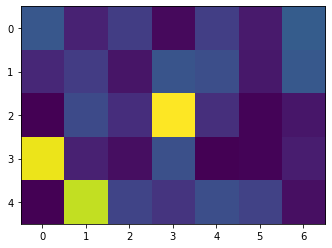

In [18]:
plt.imshow(Q[6])

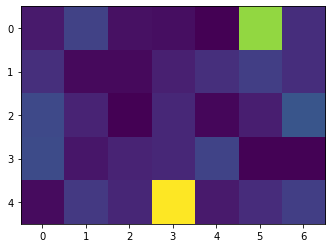

In [13]:
plt.imshow(J[0])

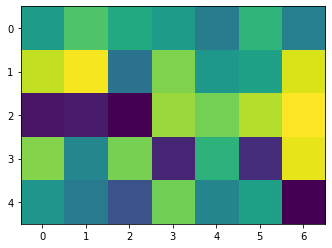

In [14]:
plt.imshow(r_Q)

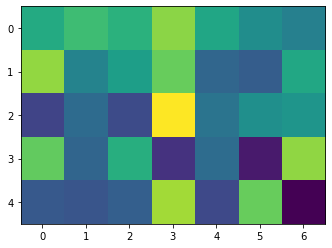

In [15]:
plt.imshow(r_J)